In [1]:

import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns
import pandas as pd
import earthpy as et
import datetime
import matplotlib.ticker

# Handle data time conversion between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
path_to_working_directory = os.path.join(et.io.HOME, "earth-analytics", "LCRWS")

if os.path.exists(path_to_working_directory):
    print("Path exists, set as working directory")
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))
else:
    print("Path does not exist, creating directories")
    os.mkdir(path_to_working_directory)
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))

Path exists, set as working directory


In [3]:
gauge_path = os.path.join(path_to_working_directory,'data',"missouri-river-near-maskal.csv")
precip_path = os.path.join(path_to_working_directory,'data',"vermillion-precip.csv")
pumping_path = os.path.join(path_to_working_directory,'data',"pumping-rates-july.csv")
obsv_path = os.path.join(path_to_working_directory,'data', "pumping-rates.csv")
egan_stage_path=os.path.join(path_to_working_directory, "")

In [4]:
vermillion_precip = pd.read_csv(precip_path,
                                       parse_dates=['DATE'],
                                       index_col=['DATE'],
                                       na_values=['999.99'])
vermillion_precip

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD
DATE,,,,,,,,
2015-03-01,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-02,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-03,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-04,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-03-05,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
...,...,...,...,...,...,...,...,...
2015-09-26,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-09-27,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0
2015-09-28,USC00398622,"VERMILLION 2 SE, SD US",42.7625,-96.9194,346.6,0.00,0,0


In [5]:
precip_day_sum = vermillion_precip['2015-03-01':'2015-09-30'].resample(
    'M').sum()

precip_list = precip_day_sum['PRCP'].values.tolist()
precip_list
df = precip_day_sum["PRCP"].mean()

In [6]:
discharge = pd.read_csv(gauge_path,
                        parse_dates=['datetime'],
                        index_col=['datetime'])
discharge

,agency_cd,site_no,stage,quality
datetime,,,,
2015-03-01 00:00:00,USGS,6478526,19.85,A
2015-03-01 00:15:00,USGS,6478526,19.86,A
2015-03-01 00:30:00,USGS,6478526,19.85,A
2015-03-01 00:45:00,USGS,6478526,19.83,A
2015-03-01 01:00:00,USGS,6478526,19.84,A
...,...,...,...,...
2015-09-30 22:45:00,USGS,6478526,21.16,A
2015-09-30 23:00:00,USGS,6478526,21.15,A
2015-09-30 23:15:00,USGS,6478526,21.16,A


In [7]:
max_day_discharge =discharge['2015'].resample(
    'D').agg({'stage': ['max']})
max_day_discharge

,stage
,max
datetime,
2015-03-01,19.86
2015-03-02,19.77
2015-03-03,19.81
2015-03-04,19.74
2015-03-05,19.44
...,...
2015-09-26,21.22
2015-09-27,21.18


In [8]:
max_day_discharge.columns = max_day_discharge.columns.map('-'.join)
max_day_discharge

,stage-max
datetime,
2015-03-01,19.86
2015-03-02,19.77
2015-03-03,19.81
2015-03-04,19.74
2015-03-05,19.44
...,...
2015-09-26,21.22
2015-09-27,21.18
2015-09-28,21.20


In [9]:
gauge_height = 1100.00
max_day_discharge['stage-max']= max_day_discharge['stage-max'] + gauge_height
max_day_discharge

,stage-max
datetime,
2015-03-01,1119.86
2015-03-02,1119.77
2015-03-03,1119.81
2015-03-04,1119.74
2015-03-05,1119.44
...,...
2015-09-26,1121.22
2015-09-27,1121.18
2015-09-28,1121.20


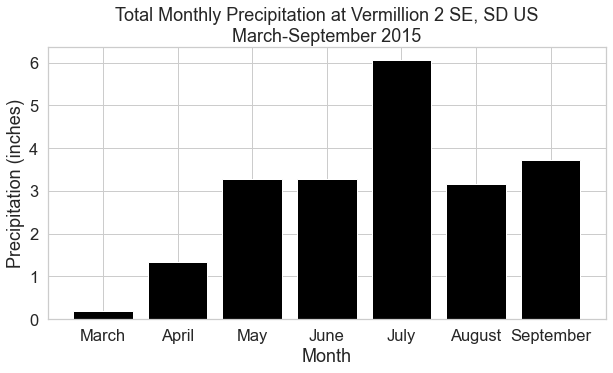

In [10]:
fig, (ax1) = plt.subplots(figsize=(10, 5))
months = ['March','April','May','June','July','August','September']
start = datetime.datetime(2015,3,1)
end = datetime.datetime(2015,9,30)
dates_list = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

# Subplot daily total precipitation for the flood event from precip_2013_day_sum
ax1.bar(months,
        precip_list,
        color='black')

ax1.set(xlabel="Month",
        
        ylabel="Precipitation (inches)",
        title="Total Monthly Precipitation at Vermillion 2 SE, SD US\nMarch-September 2015"
        )


# ax1.set_xlim(dates_list[0],dates_list[-1])

# ax1.xaxis.set_major_formatter(myFmt)
# ax1.xaxis.set_major_locator(days)
# ax1.xaxis.set_minor_locator(dayss)

# locs = list(ax1.get_xticks())+ [mdates.date2num(datetime.datetime(2015,9,30))]
# locator= matplotlib.ticker.FixedLocator(locs)
# ax1.xaxis.set_major_locator(locator)
# plt.setp(ax1.get_xticklabels(), rotation=45)

# Subplot daily stream discharge for the flood event from stream_discharge_2013
plt.show()

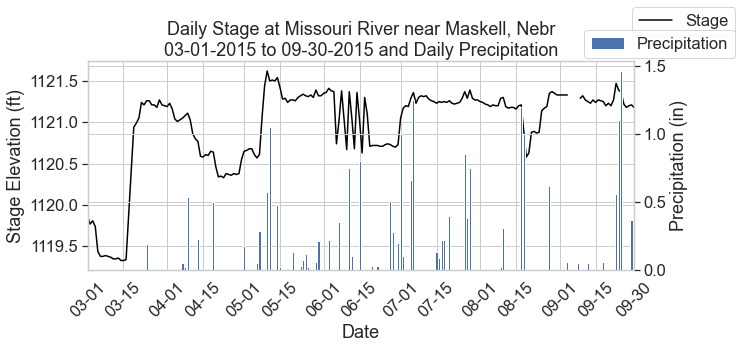

In [11]:
fig, ax2 = plt.subplots(figsize=(10,5))

myFmt = mdates.DateFormatter('%m-%d') 
months = mdates.MonthLocator()  
days = mdates.DayLocator(bymonthday=(1,15))   
dayss = mdates.DayLocator()

ax2.plot(max_day_discharge.index.values,
         max_day_discharge['stage-max'],
         color='black',
         label="Stage")

ax2.set(xlabel="Date",
        ylabel="Stage Elevation (ft)",
        
        title="Daily Stage at Missouri River near Maskell, Nebr\n03-01-2015 to 09-30-2015 and Daily Precipitation")

ax3 = ax2.twinx()

ax3.bar(vermillion_precip.index.values,
    vermillion_precip["PRCP"],
       label='Precipitation')

ax3.set(ylabel="Precipitation (in)")
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_xlim(dates_list[0],dates_list[-1])

ax2.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_locator(days)
ax2.xaxis.set_minor_locator(dayss)

locs = list(ax2.get_xticks())+ [mdates.date2num(datetime.datetime(2015,9,30))]
locator= matplotlib.ticker.FixedLocator(locs)
ax2.xaxis.set_major_locator(locator)
plt.tight_layout()
ax2.legend(loc="upper right", bbox_to_anchor=(1.2, 1.3))
ax3.legend(loc="upper right", bbox_to_anchor=(1.2, 1.19))
plt.show()

In [12]:
pumping_rates = pd.read_csv(pumping_path,
                                       parse_dates=['Date'],
                                       index_col=['Date']
                                       )
pumping_rates["Q"]
pumping_rates['Q_MGD'] = pumping_rates['Q'] * 6.22884 / 1000000
pumping_rates

,Well,Q,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Q_MGD
Date,,,,,,,,,
2015-07-01,09-1,262905.0899,NaN,NaN,NaN,NaN,NaN,NaN,1.637594
2015-07-02,09-1,253993.0530,NaN,NaN,NaN,NaN,NaN,NaN,1.582082
2015-07-03,09-1,231712.9606,NaN,NaN,NaN,NaN,NaN,NaN,1.443303
2015-07-04,09-1,249537.0345,NaN,NaN,NaN,NaN,NaN,NaN,1.554326
2015-07-05,09-1,236168.9791,NaN,NaN,NaN,NaN,NaN,NaN,1.471059
...,...,...,...,...,...,...,...,...,...
2015-07-27,03-1,155069.4429,NaN,NaN,NaN,NaN,NaN,NaN,0.965903
2015-07-28,03-1,195173.6091,NaN,NaN,NaN,NaN,NaN,NaN,1.215705
2015-07-29,03-1,173784.7205,NaN,NaN,NaN,NaN,NaN,NaN,1.082477


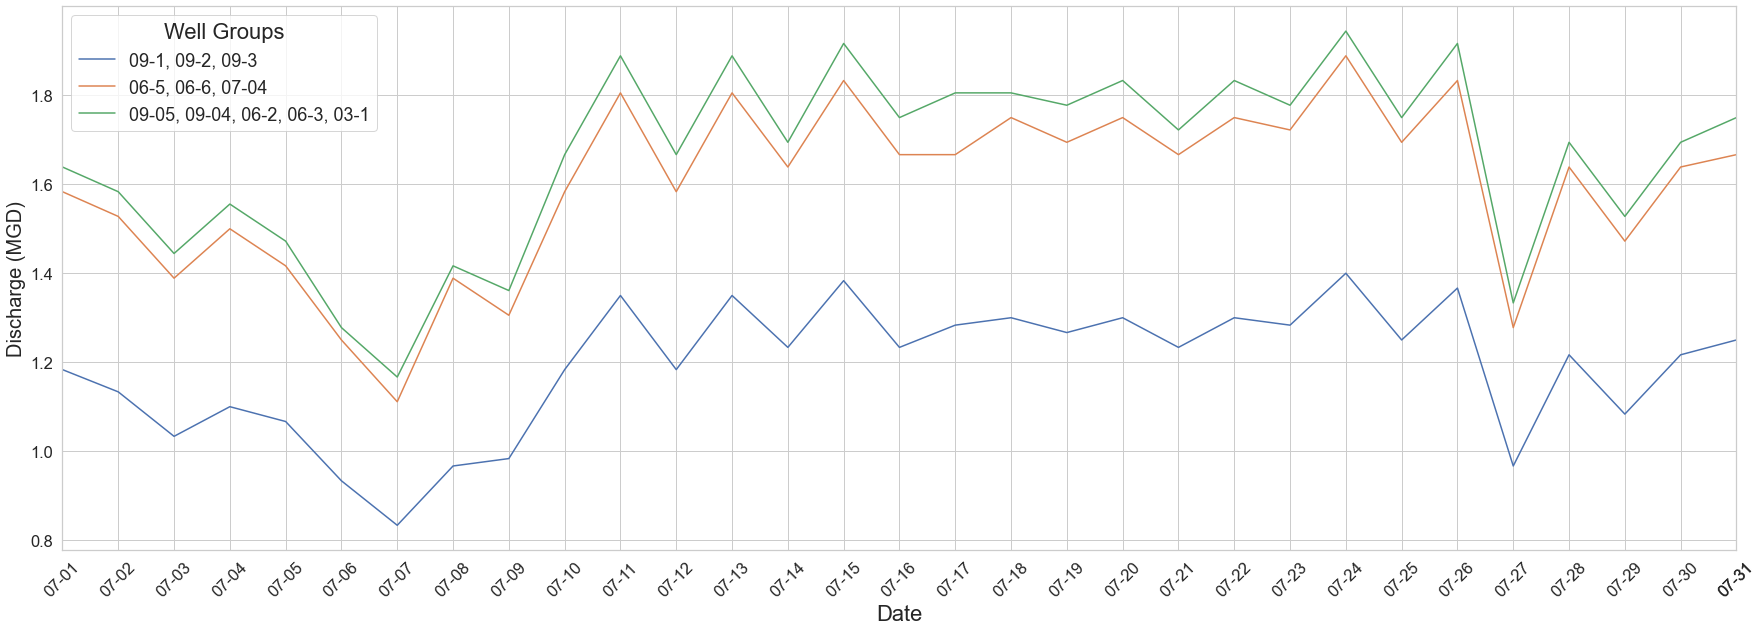

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))

labels = {"09-1, 09-2, 09-3":["09-1"],
          "06-5, 06-6, 07-04":["07-4"],
          "09-05, 09-04, 06-2, 06-3, 03-1":["03-1"]}
color = sns.color_palette("Paired",n_colors=10)        


for i, k in pumping_rates.groupby("Well"):
    k.groupby("Well").plot(y = "Q_MGD",
                           label=i,
                           
                           ax=ax)

        

plt.ylabel("Discharge (MGD)",fontsize=20)
# fig.suptitle("Daily Production Well Discharge for July 2015", fontsize='22')
plt.xlabel("Date",fontsize="22")
ax.legend(labels=labels,
           title='Well Groups',title_fontsize='22',fontsize="18")
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('yellow')
# leg.legendHandles[1].set_color('black')

start = datetime.datetime(2015,7,1)
end = datetime.datetime(2015,7,31)
dates_list = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]    
myFmt = mdates.DateFormatter('%m-%d') 
months = mdates.MonthLocator()  
days = mdates.DayLocator()   
dayss = mdates.DayLocator(bymonthday =()) 




plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_xlim(dates_list[0],dates_list[-1])

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_minor_locator(dayss)

locs = list(ax.get_xticks())+ [mdates.date2num(datetime.datetime(2015,7,31))]
locator= matplotlib.ticker.FixedLocator(locs)
ax.xaxis.set_major_locator(locator)

In [14]:
obs_wells = pd.read_csv(obsv_path,
                        parse_dates=['date'],
                        index_col=['date'],
                        na_values=['999.99'])


df = obs_wells.dropna()


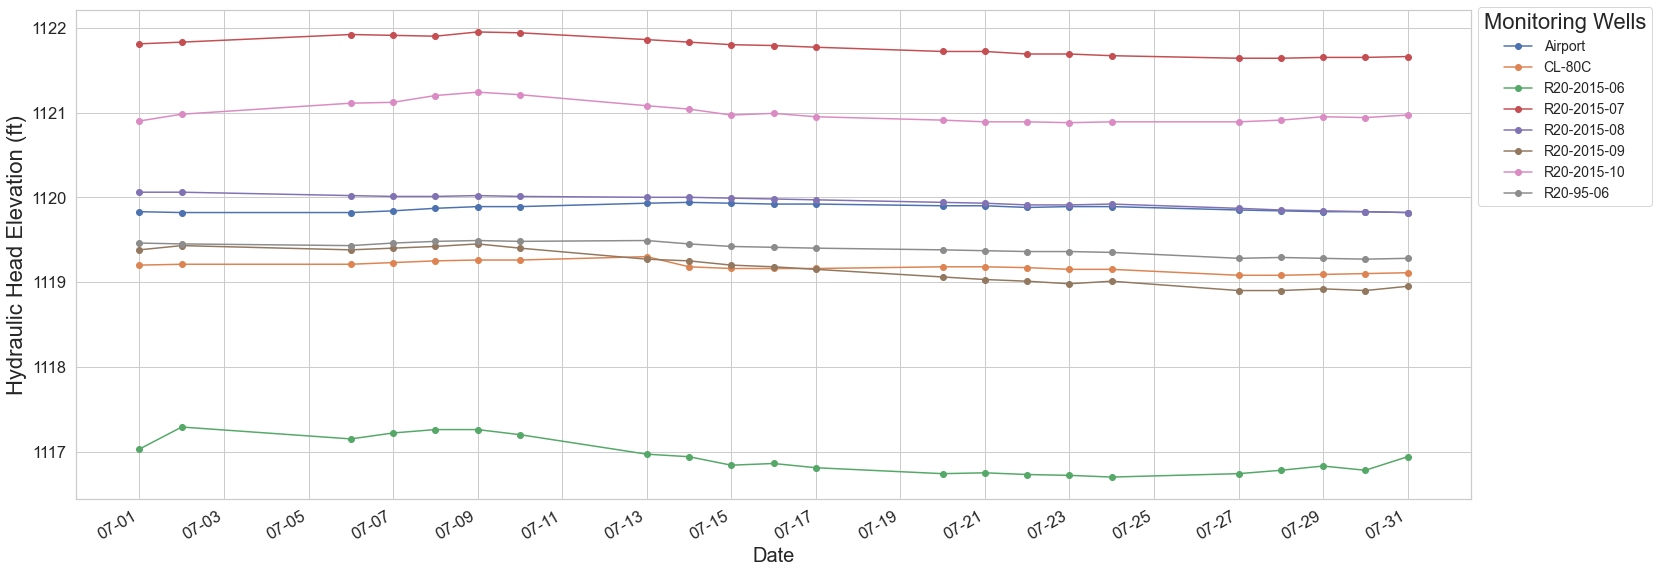

In [15]:

fig, ax = plt.subplots(figsize=(25,10))


for label, grp in df.groupby('Name'):
    grp.groupby('Name').plot(
        
             y="head",
             ax=ax,
             label=label,
             marker="o"
             
            )
ax.legend(bbox_to_anchor=(1., 1.02),loc='upper left',prop={'size':14},title='Monitoring Wells',title_fontsize='22',
          fontsize='22')

# start = datetime.datetime(2015,6,30)
# end = datetime.datetime(2015,8,1)
# dates_list = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]    
# ax.set_xlim(dates_list[0],dates_list[-1])

# myFmt = mdates.DateFormatter('%m-%d') 
# months = mdates.MonthLocator()  
# days = mdates.DayLocator()   
# dayss = mdates.DayLocator(bymonthday =()) 

# ax.xaxis.set_major_formatter(myFmt)
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_minor_locator(days)
# ax.xaxis.set_minor_locator(dayss)

# locs = list(ax.get_xticks())+ [mdates.date2num(datetime.datetime(2015,7,31))]
# locator= matplotlib.ticker.FixedLocator(locs)
# ax.xaxis.set_major_locator(locator)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))


# fig.suptitle("Hydraulic Head Measurments for July 2015", fontsize="22")
plt.xlabel("Date",fontsize='20')
plt.ylabel("Hydraulic Head Elevation (ft)", fontsize='22')
plt.show()

In [16]:
label

'R20-95-06'